In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import datetime
import torch
import gym
import custom_gym
import random
from config import cfg_seed, cfg_env, cfg_z_dim, cfg_default_lr, cfg_default_early, cfg_penalty_lam_coef
seed = cfg_seed
env_str=cfg_env
default_lr=cfg_default_lr
default_early=cfg_default_early
penalty_lam_coef=cfg_penalty_lam_coef

if cfg_env == "pendulum":
    env_name = "CustomPendulum-v0"
if cfg_env == "cartpole":
    env_name = "CustomCartPole-v0"

figfilenamehead = "fig_policy_evaluation_"+cfg_env+"_"

num_iter_max=200000


In [2]:
env = gym.make(env_name)


random.seed(seed)
np.random.seed(seed)
env.seed(seed)
env.action_space.seed(seed)
torch.manual_seed(seed)

s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = cfg_z_dim
print(s_dim, a_dim, z_dim)


2 1 1


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/home/proxima-hishinuma/anaconda3/

In [3]:
# from sac import SAC
# agent = SAC(env.observation_space.shape[0], env.action_space)
# agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_"+env_str+"_mdp_", evaluate=True)

In [4]:
# データ生成
from get_offline_data import getOfflineData
getOfflineData(env_name=env_name, episode_num=100, seed=seed)

/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(done, (bool, np.bool8)):
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:141: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `step()` method is not within the observ

In [5]:
offline_data = pickle.load(open("offline_data_"+env_str+".pkl","rb"))

debug_info = pickle.load(open("offline_data_debug_info_"+env_str+".pkl","rb"))
debug_info = np.array(debug_info)
print("offline_data[1].sum()", offline_data[1].sum())
print(debug_info.shape)
# c_array = debug_info[:,1]

# episode_index = 9
# plt.plot(offline_data[episode_index][:,0],offline_data[episode_index][:,1])
# print("env_param: ",debug_info[episode_index])

offline_data[1].sum() tensor(1117.7324)
(100, 2)


In [6]:
# import importlib
# importlib.reload(vi_base)
import vi_base

args_init_dict = {
    "offline_data": offline_data,
    "s_dim": s_dim,
    "a_dim": a_dim,
    "z_dim": z_dim,
    #              "policy":agent.select_action,
    "mdp_policy":None,
    "bamdp_policy":None,
    "debug_info":debug_info,
    "env" : env,
    "ckpt_suffix" : env_str,
    "penalty_lam_coef" : penalty_lam_coef
    }

vi = vi_base.baseVI(args_init_dict)
# print(np.random.randn())

In [7]:
train_curve1, valid_curve1 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=1)
vi.update_mulogvar_offlinedata()

# train_curve2, valid_curve2 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=2)
# vi.update_mulogvar_offlinedata()

# train_curve3, valid_curve3 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=3)
# vi.update_mulogvar_offlinedata()


train_vae: enc_dec
train: iter 0  trainloss 473.03085  validloss 482.15948±0.00000  bestvalidloss 482.15948  last_update 0
train: iter 1  trainloss 368.54796  validloss 342.76883±0.00000  bestvalidloss 342.76883  last_update 0
train: iter 2  trainloss 312.46836  validloss 295.33724±0.00000  bestvalidloss 295.33724  last_update 0
train: iter 3  trainloss 251.32427  validloss 253.47605±0.00000  bestvalidloss 253.47605  last_update 0
train: iter 4  trainloss 268.88173  validloss 153.58544±0.00000  bestvalidloss 153.58544  last_update 0
train: iter 5  trainloss 169.67809  validloss 161.46630±0.00000  bestvalidloss 153.58544  last_update 1
train: iter 6  trainloss 68.87226  validloss 13.24253±0.00000  bestvalidloss 13.24253  last_update 0
train: iter 7  trainloss -16.66788  validloss -54.49434±0.00000  bestvalidloss -54.49434  last_update 0
train: iter 8  trainloss 83.44404  validloss -38.17530±0.00000  bestvalidloss -54.49434  last_update 1
train: iter 9  trainloss -77.68646  validloss -16

train: iter 77  trainloss -541.54555  validloss -690.11627±0.00000  bestvalidloss -706.28720  last_update 1
train: iter 78  trainloss -557.45675  validloss -695.08763±0.00000  bestvalidloss -706.28720  last_update 2
train: iter 79  trainloss -545.91255  validloss -689.87110±0.00000  bestvalidloss -706.28720  last_update 3
train: iter 80  trainloss -559.06912  validloss -662.43371±0.00000  bestvalidloss -706.28720  last_update 4
train: iter 81  trainloss -539.58679  validloss -714.22335±0.00000  bestvalidloss -714.22335  last_update 0
train: iter 82  trainloss -545.61093  validloss -720.54251±0.00000  bestvalidloss -720.54251  last_update 0
train: iter 83  trainloss -561.53578  validloss -737.88671±0.00000  bestvalidloss -737.88671  last_update 0
train: iter 84  trainloss -538.52105  validloss -729.05252±0.00000  bestvalidloss -737.88671  last_update 1
train: iter 85  trainloss -511.18739  validloss -701.75181±0.00000  bestvalidloss -737.88671  last_update 2
train: iter 86  trainloss -5

train: iter 153  trainloss -638.53735  validloss -808.09913±0.00000  bestvalidloss -808.09913  last_update 0
train: iter 154  trainloss -621.22306  validloss -785.60795±0.00000  bestvalidloss -808.09913  last_update 1
train: iter 155  trainloss -578.84125  validloss -802.64379±0.00000  bestvalidloss -808.09913  last_update 2
train: iter 156  trainloss -613.28165  validloss -740.31841±0.00000  bestvalidloss -808.09913  last_update 3
train: iter 157  trainloss -353.04687  validloss -752.50411±0.00000  bestvalidloss -808.09913  last_update 4
train: iter 158  trainloss -474.56745  validloss -458.42727±0.00000  bestvalidloss -808.09913  last_update 5
train: iter 159  trainloss -595.81296  validloss -726.05726±0.00000  bestvalidloss -808.09913  last_update 6
train: iter 160  trainloss -617.49193  validloss -769.04681±0.00000  bestvalidloss -808.09913  last_update 7
train: iter 161  trainloss -622.14757  validloss -792.89532±0.00000  bestvalidloss -808.09913  last_update 8
train: iter 162  tr

train: iter 229  trainloss -682.37187  validloss -828.58205±0.00000  bestvalidloss -842.24915  last_update 15
train: iter 230  trainloss -640.66535  validloss -849.03770±0.00000  bestvalidloss -849.03770  last_update 0
train: iter 231  trainloss -660.11351  validloss -804.69615±0.00000  bestvalidloss -849.03770  last_update 1
train: iter 232  trainloss -652.73722  validloss -784.13101±0.00000  bestvalidloss -849.03770  last_update 2
train: iter 233  trainloss -664.82121  validloss -790.59631±0.00000  bestvalidloss -849.03770  last_update 3
train: iter 234  trainloss -669.64454  validloss -836.01167±0.00000  bestvalidloss -849.03770  last_update 4
train: iter 235  trainloss -668.87608  validloss -827.95844±0.00000  bestvalidloss -849.03770  last_update 5
train: iter 236  trainloss -642.90950  validloss -822.27744±0.00000  bestvalidloss -849.03770  last_update 6
train: iter 237  trainloss -655.22975  validloss -704.81411±0.00000  bestvalidloss -849.03770  last_update 7
train: iter 238  t

train: iter 304  trainloss -538.55673  validloss -704.00949±0.00000  bestvalidloss -866.30384  last_update 51
train: iter 305  trainloss -553.10558  validloss -717.34184±0.00000  bestvalidloss -866.30384  last_update 52
train: iter 306  trainloss -564.78753  validloss -761.96248±0.00000  bestvalidloss -866.30384  last_update 53
train: iter 307  trainloss -574.34808  validloss -748.06036±0.00000  bestvalidloss -866.30384  last_update 54
train: iter 308  trainloss -579.85932  validloss -759.35558±0.00000  bestvalidloss -866.30384  last_update 55
train: iter 309  trainloss -592.65210  validloss -772.49839±0.00000  bestvalidloss -866.30384  last_update 56
train: iter 310  trainloss -600.36932  validloss -788.91398±0.00000  bestvalidloss -866.30384  last_update 57
train: iter 311  trainloss -600.75674  validloss -802.88652±0.00000  bestvalidloss -866.30384  last_update 58
train: iter 312  trainloss -603.70185  validloss -762.03236±0.00000  bestvalidloss -866.30384  last_update 59
train: ite

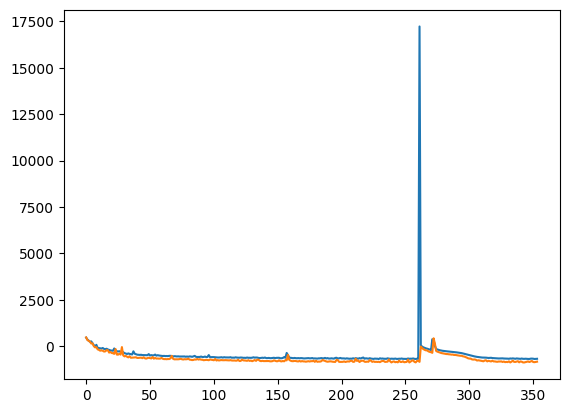

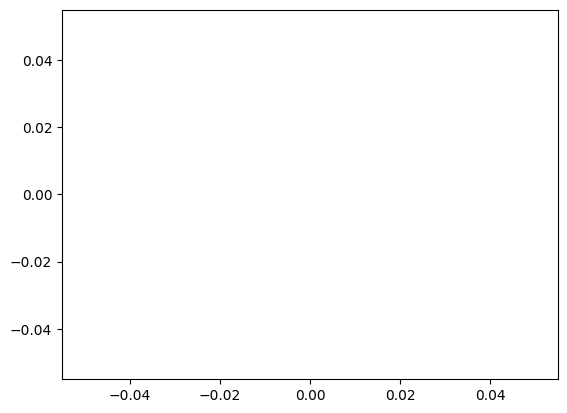

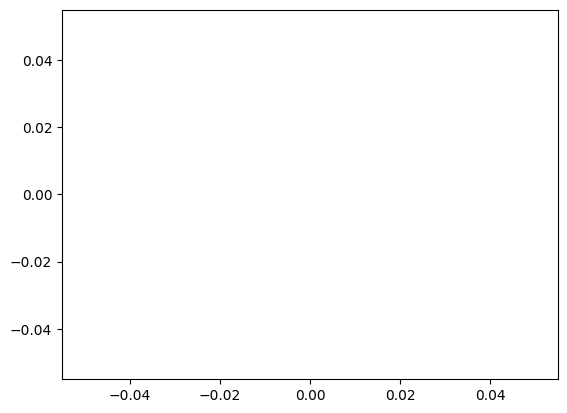

In [8]:
plt.plot(train_curve1)
plt.plot(valid_curve1)
# plt.ylim([-2000, 1000])
plt.show()

# plt.plot(train_curve2)
# plt.plot(valid_curve2)
# plt.show()

# plt.plot(train_curve3)
# plt.plot(valid_curve3)
# plt.show()

In [9]:
train_curve, valid_curve = vi.train_initial_belief(num_iter=100000, lr=1e-3, early_stop_step=default_early)


train: iter 0  trainloss 9.81183  validloss 11.64342±0.00000  bestvalidloss 11.64342  last_update 0
train: iter 1  trainloss 8.97578  validloss 10.58487±0.00000  bestvalidloss 10.58487  last_update 0
train: iter 2  trainloss 8.24487  validloss 9.69750±0.00000  bestvalidloss 9.69750  last_update 0
train: iter 3  trainloss 7.60055  validloss 8.89608±0.00000  bestvalidloss 8.89608  last_update 0
train: iter 4  trainloss 7.06911  validloss 8.24464±0.00000  bestvalidloss 8.24464  last_update 0
train: iter 5  trainloss 6.58649  validloss 7.64569±0.00000  bestvalidloss 7.64569  last_update 0
train: iter 6  trainloss 6.16703  validloss 7.16553±0.00000  bestvalidloss 7.16553  last_update 0
train: iter 7  trainloss 5.80182  validloss 6.71165±0.00000  bestvalidloss 6.71165  last_update 0
train: iter 8  trainloss 5.46456  validloss 6.29427±0.00000  bestvalidloss 6.29427  last_update 0
train: iter 9  trainloss 5.17030  validloss 5.94810±0.00000  bestvalidloss 5.94810  last_update 0
train: iter 10  

train: iter 94  trainloss 1.57478  validloss 1.32254±0.00000  bestvalidloss 1.32254  last_update 0
train: iter 95  trainloss 1.56718  validloss 1.31046±0.00000  bestvalidloss 1.31046  last_update 0
train: iter 96  trainloss 1.56893  validloss 1.29683±0.00000  bestvalidloss 1.29683  last_update 0
train: iter 97  trainloss 1.54635  validloss 1.28608±0.00000  bestvalidloss 1.28608  last_update 0
train: iter 98  trainloss 1.55044  validloss 1.27258±0.00000  bestvalidloss 1.27258  last_update 0
train: iter 99  trainloss 1.56271  validloss 1.26031±0.00000  bestvalidloss 1.26031  last_update 0
train: iter 100  trainloss 1.56889  validloss 1.25324±0.00000  bestvalidloss 1.25324  last_update 0
train: iter 101  trainloss 1.55079  validloss 1.24840±0.00000  bestvalidloss 1.24840  last_update 0
train: iter 102  trainloss 1.55062  validloss 1.23952±0.00000  bestvalidloss 1.23952  last_update 0
train: iter 103  trainloss 1.54698  validloss 1.23404±0.00000  bestvalidloss 1.23404  last_update 0
train:

train: iter 176  trainloss 1.55209  validloss 1.12252±0.00000  bestvalidloss 1.12252  last_update 0
train: iter 177  trainloss 1.54046  validloss 1.12678±0.00000  bestvalidloss 1.12252  last_update 1
train: iter 178  trainloss 1.54928  validloss 1.12220±0.00000  bestvalidloss 1.12220  last_update 0
train: iter 179  trainloss 1.55527  validloss 1.12200±0.00000  bestvalidloss 1.12200  last_update 0
train: iter 180  trainloss 1.54295  validloss 1.12463±0.00000  bestvalidloss 1.12200  last_update 1
train: iter 181  trainloss 1.53887  validloss 1.12720±0.00000  bestvalidloss 1.12200  last_update 2
train: iter 182  trainloss 1.56779  validloss 1.12444±0.00000  bestvalidloss 1.12200  last_update 3
train: iter 183  trainloss 1.53494  validloss 1.12827±0.00000  bestvalidloss 1.12200  last_update 4
train: iter 184  trainloss 1.54143  validloss 1.12224±0.00000  bestvalidloss 1.12200  last_update 5
train: iter 185  trainloss 1.53718  validloss 1.12439±0.00000  bestvalidloss 1.12200  last_update 6


train: iter 270  trainloss 1.54011  validloss 1.12155±0.00000  bestvalidloss 1.11579  last_update 67
train: iter 271  trainloss 1.53322  validloss 1.12129±0.00000  bestvalidloss 1.11579  last_update 68
train: iter 272  trainloss 1.54204  validloss 1.12061±0.00000  bestvalidloss 1.11579  last_update 69
train: iter 273  trainloss 1.54606  validloss 1.12223±0.00000  bestvalidloss 1.11579  last_update 70
train: iter 274  trainloss 1.52325  validloss 1.12401±0.00000  bestvalidloss 1.11579  last_update 71
train: iter 275  trainloss 1.53779  validloss 1.11974±0.00000  bestvalidloss 1.11579  last_update 72
train: iter 276  trainloss 1.53143  validloss 1.11956±0.00000  bestvalidloss 1.11579  last_update 73
train: iter 277  trainloss 1.54665  validloss 1.11688±0.00000  bestvalidloss 1.11579  last_update 74
train: iter 278  trainloss 1.54474  validloss 1.11699±0.00000  bestvalidloss 1.11579  last_update 75
train: iter 279  trainloss 1.53902  validloss 1.12336±0.00000  bestvalidloss 1.11579  last_

In [10]:
print(vi.initial_belief)

Parameter containing:
tensor([-4.1829,  0.2425], requires_grad=True)


In [11]:
train_curve, valid_curve = vi.train_penalty(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early)

train: iter 0  trainloss 15.73258  validloss 23.75995±0.00000  bestvalidloss 23.75995  last_update 0
train: iter 1  trainloss 10.04231  validloss 15.86321±0.00000  bestvalidloss 15.86321  last_update 0
train: iter 2  trainloss 6.68247  validloss 9.42719±0.00000  bestvalidloss 9.42719  last_update 0
train: iter 3  trainloss 5.50495  validloss 5.94633±0.00000  bestvalidloss 5.94633  last_update 0
train: iter 4  trainloss 4.90360  validloss 4.86731±0.00000  bestvalidloss 4.86731  last_update 0
train: iter 5  trainloss 4.65234  validloss 4.20493±0.00000  bestvalidloss 4.20493  last_update 0
train: iter 6  trainloss 4.54244  validloss 3.82237±0.00000  bestvalidloss 3.82237  last_update 0
train: iter 7  trainloss 4.32359  validloss 3.87698±0.00000  bestvalidloss 3.82237  last_update 1
train: iter 8  trainloss 4.30722  validloss 3.58195±0.00000  bestvalidloss 3.58195  last_update 0
train: iter 9  trainloss 4.16052  validloss 3.55931±0.00000  bestvalidloss 3.55931  last_update 0
train: iter 10

train: iter 83  trainloss 2.46155  validloss 3.20628±0.00000  bestvalidloss 2.72548  last_update 4
train: iter 84  trainloss 2.53073  validloss 2.91963±0.00000  bestvalidloss 2.72548  last_update 5
train: iter 85  trainloss 2.43713  validloss 2.84314±0.00000  bestvalidloss 2.72548  last_update 6
train: iter 86  trainloss 2.45264  validloss 3.47439±0.00000  bestvalidloss 2.72548  last_update 7
train: iter 87  trainloss 2.37106  validloss 3.39459±0.00000  bestvalidloss 2.72548  last_update 8
train: iter 88  trainloss 2.41645  validloss 3.02813±0.00000  bestvalidloss 2.72548  last_update 9
train: iter 89  trainloss 2.61227  validloss 3.22677±0.00000  bestvalidloss 2.72548  last_update 10
train: iter 90  trainloss 2.59235  validloss 2.97373±0.00000  bestvalidloss 2.72548  last_update 11
train: iter 91  trainloss 2.47271  validloss 2.61041±0.00000  bestvalidloss 2.61041  last_update 0
train: iter 92  trainloss 2.47274  validloss 3.59866±0.00000  bestvalidloss 2.61041  last_update 1
train: i

train: iter 165  trainloss 2.49363  validloss 3.11321±0.00000  bestvalidloss 2.60150  last_update 7
train: iter 166  trainloss 2.48847  validloss 3.37751±0.00000  bestvalidloss 2.60150  last_update 8
train: iter 167  trainloss 2.54428  validloss 2.89522±0.00000  bestvalidloss 2.60150  last_update 9
train: iter 168  trainloss 2.53064  validloss 3.49822±0.00000  bestvalidloss 2.60150  last_update 10
train: iter 169  trainloss 2.49378  validloss 2.54001±0.00000  bestvalidloss 2.54001  last_update 0
train: iter 170  trainloss 2.42952  validloss 3.05715±0.00000  bestvalidloss 2.54001  last_update 1
train: iter 171  trainloss 2.51609  validloss 3.44856±0.00000  bestvalidloss 2.54001  last_update 2
train: iter 172  trainloss 2.52398  validloss 2.90705±0.00000  bestvalidloss 2.54001  last_update 3
train: iter 173  trainloss 2.43436  validloss 3.15647±0.00000  bestvalidloss 2.54001  last_update 4
train: iter 174  trainloss 2.41046  validloss 3.03821±0.00000  bestvalidloss 2.54001  last_update 5

train: iter 247  trainloss 2.54672  validloss 2.70180±0.00000  bestvalidloss 2.47894  last_update 9
train: iter 248  trainloss 2.47734  validloss 2.67370±0.00000  bestvalidloss 2.47894  last_update 10
train: iter 249  trainloss 2.44332  validloss 3.46695±0.00000  bestvalidloss 2.47894  last_update 11
train: iter 250  trainloss 2.44295  validloss 3.23036±0.00000  bestvalidloss 2.47894  last_update 12
train: iter 251  trainloss 2.47919  validloss 3.09009±0.00000  bestvalidloss 2.47894  last_update 13
train: iter 252  trainloss 2.60222  validloss 3.24870±0.00000  bestvalidloss 2.47894  last_update 14
train: iter 253  trainloss 2.49750  validloss 2.95452±0.00000  bestvalidloss 2.47894  last_update 15
train: iter 254  trainloss 2.40437  validloss 2.98914±0.00000  bestvalidloss 2.47894  last_update 16
train: iter 255  trainloss 2.50287  validloss 3.03192±0.00000  bestvalidloss 2.47894  last_update 17
train: iter 256  trainloss 2.54810  validloss 2.98597±0.00000  bestvalidloss 2.47894  last_u

train: iter 330  trainloss 2.60322  validloss 3.56358±0.00000  bestvalidloss 2.47894  last_update 92
train: iter 331  trainloss 2.47434  validloss 3.03713±0.00000  bestvalidloss 2.47894  last_update 93
train: iter 332  trainloss 2.42186  validloss 2.98317±0.00000  bestvalidloss 2.47894  last_update 94
train: iter 333  trainloss 2.36626  validloss 3.14814±0.00000  bestvalidloss 2.47894  last_update 95
train: iter 334  trainloss 2.42697  validloss 3.32784±0.00000  bestvalidloss 2.47894  last_update 96
train: iter 335  trainloss 2.42777  validloss 3.03575±0.00000  bestvalidloss 2.47894  last_update 97
train: iter 336  trainloss 2.49827  validloss 3.24412±0.00000  bestvalidloss 2.47894  last_update 98
train: iter 337  trainloss 2.55660  validloss 3.19632±0.00000  bestvalidloss 2.47894  last_update 99
train: iter 338  trainloss 2.45894  validloss 3.09831±0.00000  bestvalidloss 2.47894  last_update 100
train: fin


In [12]:

vi.save(ckpt_key="unweighted")

base save ckpt ckpt_basevi_pendulum_unweighted
base load self.initial_belief.data.sum() tensor(-3.9404)
base load dec.state_dict()['net_phat.0.weight'].sum() tensor(-4.6625)


In [13]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

1.3723402208699682
tensor([0.4438])
